# Análisis de la distribución de la popularidad (número de reseñas en el primer mes) #

El objetivo de este notebook es analizar la distribución del número de reseñas de los juegos en Steam

In [37]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

#### Creación del dataset:
Es necesario leer el json y crear un dataset a patir de la lista asociada a la clave `data`.

In [38]:
ruta = Path("data/info_steam_games.json")

if not ruta.exists():
    raise FileNotFoundError(f"No se encuentra la ruta: {ruta}")

with open("data/info_steam_games.json", "r", encoding="UTF-8") as f:
    data = json.load(f)
    
df = pd.DataFrame(data['data'])

df

,id,appdetails,appreviewhistogram
0,570,"{'name': 'Dota 2', 'required_age': 0, 'short_d...","{'start_date': 1312156800, 'end_date': 1770422..."
1,620,"{'name': 'Portal 2', 'required_age': 0, 'short...","{'start_date': 1302566400, 'end_date': 1770422..."
2,730,"{'name': 'Counter-Strike 2', 'required_age': 0...","{'start_date': 1336780800, 'end_date': 1770422..."
3,1313,"{'name': 'SiN Gold', 'required_age': 0, 'short...","{'start_date': 1290211200, 'end_date': 1769040..."
4,2210,"{'name': 'Quake 4', 'required_age': '18', 'sho...","{'start_date': 1312502400, 'end_date': 1770249..."
...,...,...,...
1995,293900,"{'name': 'Pivvot', 'required_age': 0, 'short_d...","{'start_date': 1404950400, 'end_date': 1757116..."
1996,293920,"{'name': 'Spirited Heart Deluxe', 'required_ag...","{'start_date': 1401494400, 'end_date': 1767312..."
1997,293940,"{'name': 'Kill The Bad Guy', 'required_age': 0...","{'start_date': 1401235200, 'end_date': 1759795..."
1998,293960,"{'name': 'Spice Road', 'required_age': 0, 'sho...","{'start_date': 1398297600, 'end_date': 1761091..."


#### Modificación del dataframe:
Creación de columnas `free` que sirve para separar las distribuciones de los juegos gratuitos de los no gratuitos

In [39]:
df["name"] = df["appdetails"].apply(lambda x : x.get("name") if isinstance(x,dict) else None)
df["free"] = df["appdetails"].apply(lambda x: True if x.get("price_overview").get("initial") == 0 else False)
df.drop(columns=["appdetails"], inplace=True)

Creación de las columnas `recomendaciones_positivas` y `recomendaciones_negativas`.

In [40]:

df["recomendaciones_positivas"] = df["appreviewhistogram"].apply(lambda x: x.get("rollups").get("recommendations_up") if isinstance(x, dict) else None)
df["recomendaciones_negativas"] = df["appreviewhistogram"].apply(lambda x: x.get("rollups").get("recommendations_down") if isinstance(x, dict) else None)

Se comprueba que no hay nulos en ninguna de las 2 columnas creadas

In [41]:
print(f"Nulos en columna recomendaciones positivas: {df["recomendaciones_negativas"].isna().sum()}, Nulos en columna recomendaciones negativas: {df["recomendaciones_positivas"].isna().sum()}")

Nulos en columna recomendaciones positivas: 0, Nulos en columna recomendaciones negativas: 0


Por último se ordena el dataset por el número de reseñas totales

In [69]:
df["total"] = df["recomendaciones_positivas"] + df["recomendaciones_negativas"]

df.sort_values(by="total",ascending=False, inplace=True)

df.head(n=20)

,id,appreviewhistogram,name,free,recomendaciones_positivas,recomendaciones_negativas,total
1563,275850,"{'start_date': 1470960000, 'end_date': 1770508...",No Man's Sky,False,22057,24935,46992
1331,264710,"{'start_date': 1395360000, 'end_date': 1770422...",Subnautica,False,8175,263,8438
1811,287700,"{'start_date': 1441065600, 'end_date': 1770422...",METAL GEAR SOLID V: THE PHANTOM PAIN,False,6832,787,7619
1938,292030,"{'start_date': 1431907200, 'end_date': 1770508...",The Witcher 3: Wild Hunt,False,6680,409,7089
1022,251570,"{'start_date': 1386892800, 'end_date': 1770422...",7 Days to Die,False,5516,1338,6854
1937,292000,"{'start_date': 1729555200, 'end_date': 1770508...",No More Room in Hell 2,False,2762,3682,6444
1849,289070,"{'start_date': 1476921600, 'end_date': 1770508...",Sid Meier’s Civilization® VI,False,4629,1507,6136
1404,268500,"{'start_date': 1454544000, 'end_date': 1770422...",XCOM® 2,False,4619,1203,5822
1128,255710,"{'start_date': 1425945600, 'end_date': 1770422...",Cities: Skylines,False,5103,199,5302
1003,250900,"{'start_date': 1415059200, 'end_date': 1770422...",The Binding of Isaac: Rebirth,False,5145,121,5266


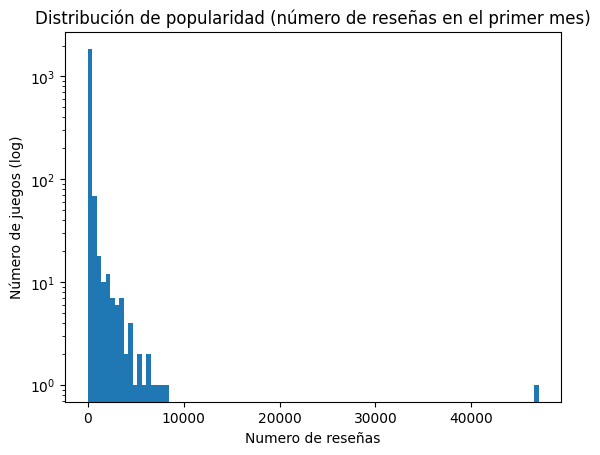

In [43]:
plt.hist(x=df["total"], bins=100)
plt.yscale("log")
plt.xlabel("Numero de reseñas")
plt.ylabel("Número de juegos (log)")
plt.title("Distribución de popularidad (número de reseñas en el primer mes)")
plt.show()

In [67]:
fig = px.histogram(df, x = "total",title="Distribución de popularidad (número de reseñas en el primer mes)",
                   labels={"x":"Número de reseñas", "y":"Número de juegos (log)"},nbins= 100,color = "free", opacity= 0.9,facet_col="free")
fig.update_yaxes(type="log")

fig.show()

In [45]:
print(f"Número de juegos con menos de 10 reseñas en el primer mes: {df[df["total"] < 50].shape[0]}")

Número de juegos con menos de 10 reseñas en el primer mes: 1398


Conclusiones:

Se aprecia que la distribución era la que esperábamos, una de cola larga con gran concentración de juegos alrededorde números de reseñas bajos y solo unos pocos con muchas reseñas. Además parece que la distribución se mantiene en las distintas categorías (los juegos gratuitos presentan la misma distribución que los no gratuitos).

Se puede comprobar si la distribución se mantiene a lo largo de distintas categorías diferentes. -> COMPLETAR